In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
%matplotlib inline

In [2]:
def load_dataset(name):
    return np.loadtxt(name)

In [5]:
#dataset = pd.read_csv('durudataset.txt',header=None)
dataset = load_dataset('durudataset.txt')

In [6]:
dataset

array([[ 0.19670575,  0.26617497],
       [ 0.41328699,  0.35582835],
       [ 0.33843555,  0.43573826],
       [ 0.10380152,  0.16434481],
       [ 0.15905236,  0.32505901],
       [ 0.06690549,  0.48741807],
       [ 0.33573144,  0.03798368],
       [ 0.28549554,  0.29350958],
       [ 0.08488353,  0.20694325],
       [ 0.07382789,  0.15456821],
       [ 0.23803986,  0.13191702],
       [ 0.45405121,  0.37938313],
       [ 0.27608751,  0.49760799],
       [ 0.01646995,  0.09328572],
       [ 0.02693146,  0.39057263],
       [ 0.40253161,  0.09789899],
       [ 0.22568743,  0.49617949],
       [ 0.19132311,  0.40113078],
       [ 0.39482185,  0.21211335],
       [ 0.18214343,  0.36443193],
       [ 1.49835358,  1.40350139],
       [ 1.80899027,  1.93497909],
       [ 1.35650893,  1.47948455],
       [ 1.07324343,  1.23179161],
       [ 1.59099146,  1.39629025],
       [ 1.91018783,  1.70507748],
       [ 1.19376594,  1.55855903],
       [ 1.43236779,  1.7566307 ],
       [ 1.74915973,

In [81]:
type(dataset)

numpy.ndarray

In [23]:
def plot_data(dataset,threshold = 1):
    for point in dataset:
        x,y=point
        plt.scatter(x,y)
        '''if x > threshold:
            plt.scatter(x,y,color='r',marker='o')
        else:
            plt.scatter(x,y,color='g',marker='o')'''
    plt.grid()
    plt.title("Dummy")
    plt.ylabel("Vertical")
    plt.xlabel("Horizontal")

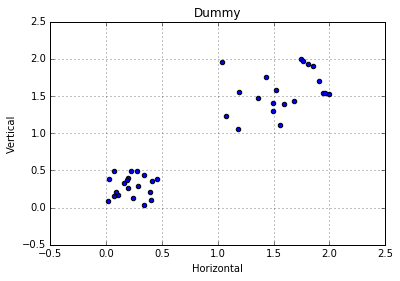

In [24]:
plot_data(dataset)

In [25]:
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [26]:
a=[0.49,	0.29,	0.48,	0.5,	0.56,	0.24,	0.35]
b=[0.07,	0.40,	0.48,	0.5,	0.54,	0.35,	0.44]
euclidian(np.array(a),np.array(b))

0.457274534606947

In [74]:
def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[1]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [28]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(2)

In [29]:
def kmeans(k,dataset, epsilon=0, distance='euclidian'):
    print("Working...")
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,instance)
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
        tmp_prototypes = np.zeros((k, num_features))
        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)

    # plot(dataset, history_centroids, belongs_to)
    return prototypes, history_centroids, belongs_to

In [79]:
def predict(centroids,vector_test):
    tmp_dist = 9999
    dist_vec = np.zeros((2,1))
    for index_centroid,centroid in enumerate(centroids):
        if euclidian(centroid,vector_test) <= tmp_dist:
            tmp_dist = euclidian(centroid,vector_test)
            closest_centroid = centroid
    return np.argmin(np.sum((centroids - vector_test)**2, axis=1)),closest_centroid

In [80]:
def main():
    dataset = load_dataset('durudataset.txt')
    centroids, history_centroids, belongs_to = kmeans(2,dataset)
    print("=======================================================")
    print("Centroids {}".format(centroids))
    plot(dataset, history_centroids, belongs_to)
    return centroids, history_centroids, belongs_to
    

Working...
Centroids [[ 1.58058247  1.56897412]
 [ 0.22331067  0.28960446]]


<IPython.core.display.Javascript object>


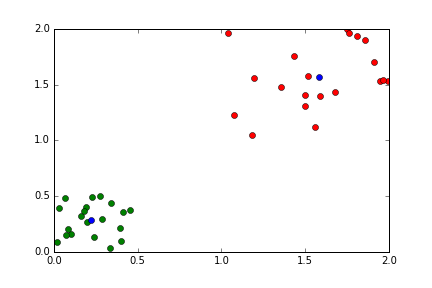

centroids 1 [ 1.58058247  1.56897412]
centroids 1 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 2 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]


In [75]:
%matplotlib notebook
centroids, history_centroids, belongs_to=main()